# Linear Regression Assignment

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

Note : We are taken the boston dataset by using simple function boston()

In [2]:
boston.data.shape

(506, 13)

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston.target.shape

(506,)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1) # Bosten Housing Price
Y = bos['PRICE'] # All other features

print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


observation :
    
1. The data points of bosten.target, we are transfering to the PRICE that in the dataframe of Bosten i.e.. bos (bos['PRICE'])

2. Transfered points we are considering into data points of Y

In [6]:
# importing Sklearn 
import sklearn
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(339, 13)
(339,)
(167, 13)
(167,)


C:\Users\PRUTHVI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


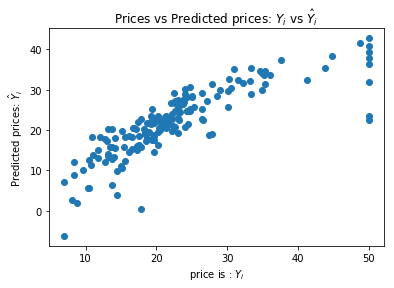

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("price is : $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

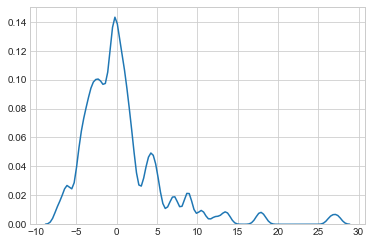

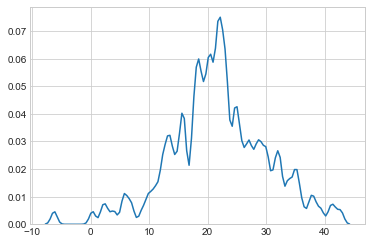

In [8]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
sns.set_style('whitegrid')
#delta_y
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()
#Y_pred
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

In [9]:
data = bos.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
mini = bos.sample(n=1) # get one random row from dataset
mini

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
312,0.26169,0.0,9.9,0.0,0.544,6.023,90.4,2.834,4.0,304.0,18.4,396.3,11.72,19.4


In [12]:
import pandas as pd
import numpy as np
from math import sqrt
bos=bos.sample(frac=1)

X = mini.drop('PRICE', axis = 1).values # Bosten Housing Price
Y = mini['PRICE'].values # All other features

m_current=0
b_current=0

epochs=10000
learning_rate=0.0001
N = float(len(Y))

mini = bos.sample(n=1) # get one random row from dataset

X_mini = mini.drop('PRICE',axis=1).values
Y_mini = mini['PRICE'].values

for i in range(epochs):
    Y_current = (m_current * X) + b_current
   
    cost= sum([data**2 for data in (Y-Y_current)]) / N
    m_gradient = -(2/N) * (X_mini*(Y_mini - Y_current))
    b_gradient = -(2/N) * (Y_mini - Y_current)

    m_current = m_current - (learning_rate * m_gradient)
    b_current = b_current - (learning_rate * b_gradient)
print(b_gradient)    

C:\Users\PRUTHVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square
C:\Users\PRUTHVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in multiply
C:\Users\PRUTHVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract


[[-8.14718959e-10 -2.30069980e+00 -2.84217094e-14 -2.30069980e+00
  -1.08234014e+00 -1.38555833e-13  3.55271368e-15 -2.52880081e-04
  -6.75015599e-14             nan -1.06581410e-14             nan
  -1.42108547e-14]]
